<a href="https://colab.research.google.com/github/Manav-Gupta/Solar-Irradiance-Bio-Inspired/blob/main/greywolfLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/BA_Combined.csv')
dataset.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2010,1,1,0,30,0,0,0,-5,11.852440,996.147217,29.790052,36.635731,2.722316
1,2010,1,1,1,30,0,0,0,-5,11.225597,996.248657,30.983252,38.746647,2.707211
2,2010,1,1,2,30,0,0,0,-5,10.658190,995.821533,32.399748,41.129784,2.798367
3,2010,1,1,3,30,0,0,0,-4,10.129504,995.645081,34.192746,44.009598,2.898466
4,2010,1,1,4,30,0,0,0,-4,9.635840,995.924561,36.213530,47.319065,2.890179
5,2010,1,1,5,30,0,0,0,-4,13.329075,996.727173,29.696787,49.007072,3.624711
6,2010,1,1,6,30,0,0,0,-3,12.871681,997.495850,31.083023,57.249115,3.618878
7,2010,1,1,7,30,0,0,0,-3,13.520990,998.175964,31.173157,64.765450,3.562192
8,2010,1,1,8,30,80,292,135,-2,16.388988,998.849304,27.988229,70.387955,3.084073
9,2010,1,1,9,30,118,577,331,0,19.753776,999.441589,25.638371,72.587616,2.419390


Using TensorFlow backend.


    Month  Day  Hour  ...    Pressure  Relative Humidity  Wind Speed
0       1    1     0  ...  996.147217          29.790052    2.722316
1       1    1     1  ...  996.248657          30.983252    2.707211
2       1    1     2  ...  995.821533          32.399748    2.798367
3       1    1     3  ...  995.645081          34.192746    2.898466
4       1    1     4  ...  995.924561          36.213530    2.890179
5       1    1     5  ...  996.727173          29.696787    3.624711
6       1    1     6  ...  997.495850          31.083023    3.618878
7       1    1     7  ...  998.175964          31.173157    3.562192
8       1    1     8  ...  998.849304          27.988229    3.084073
9       1    1     9  ...  999.441589          25.638371    2.419390
10      1    1    10  ...  999.189270          21.699108    2.170230
11      1    1    11  ...  998.304016          18.483890    1.936101
12      1    1    12  ...  997.064331          17.682752    1.393144
13      1    1    13  ...  996.438

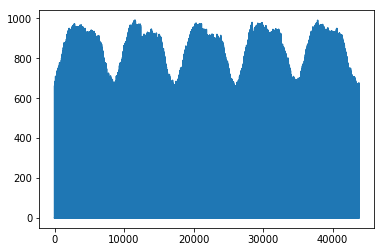

In [ ]:
# importing all the required libraries
from math import sqrt
import keras
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from datetime import datetime
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/BA_Combined.csv')
#Removing unnecessary data
dataset.drop('Minute',axis=1,inplace=True)
dataset.drop('Year',axis=1,inplace=True)
dataset.drop('DHI',axis=1,inplace=True)
dataset.drop('DNI',axis=1,inplace=True)
dataset.drop('Wind Direction',axis=1,inplace=True)
dataset.columns=['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']
dataset = dataset[['Month','Day','Hour','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']]
print(dataset.head(20))

dataset.to_csv('final.csv')
plt.plot(dataset['GHI'])

In [ ]:
dataset=read_csv('final.csv',header=0,index_col=0)
dataset1=dataset.values
dataset2=dataset['GHI'].values
dataset.head()

,Month,Day,Hour,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Speed
0,1,1,0,0,-5,11.852440,996.147217,29.790052,2.722316
1,1,1,1,0,-5,11.225597,996.248657,30.983252,2.707211
2,1,1,2,0,-5,10.658190,995.821533,32.399748,2.798367
3,1,1,3,0,-4,10.129504,995.645081,34.192746,2.898466
4,1,1,4,0,-4,9.635840,995.924560,36.213530,2.890179


In [ ]:
#Scaling data
scale_x = MinMaxScaler(feature_range=(0,1))
scaled_x=scale_x.fit_transform(dataset1)
print(scaled_x.shape)

dataset2=dataset2.reshape(-1, 1)
scale_y = MinMaxScaler(feature_range=(0,1))
scaled_y=scale_y.fit_transform(dataset2)
print(scaled_y.shape)

(43800, 9)
(43800, 1)


In [ ]:
# vector to matrix conversion function for weights matrix
x=list()
y=list()
for i in range(len(dataset)-25):
  xx=list()
  for j in range(0,24,1):
    value=scaled_x[i+j]
    xx.append(value)
  x.append(xx)
  yy=scaled_y[i+24]
  y.append(yy)
x=np.array(x)
y=np.array(y)
print(x.shape)


(43775, 24, 9)


In [ ]:
#Splitting data into training 70% , testing 15% and validation 15%
n_train_hours = 32831
n_valid_hours = 37208

train_x = x[:n_train_hours]
test_x = x[n_valid_hours:]
valid_x= x[n_train_hours:n_valid_hours]

train_y = y[:n_train_hours]
test_y = y[n_valid_hours:]
valid_y= y[n_train_hours:n_valid_hours]

In [ ]:
#Declaration of model
model = Sequential()
#adding LSTM layer
model.add(LSTM(64, input_shape=(24,9),kernel_initializer='truncated_normal'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mae', optimizer=Adam(lr=0.01))

In [ ]:
#Defining the weights
weight1=model.get_weights()
w0=weight1[0]
w1=weight1[1]
w2=weight1[2]
w3=weight1[3]
W0=w0
W1=w1
W3=w3

In [ ]:
print(w0.shape)
print(w1.shape)
print(w2.shape)
print(w3.shape)

(9, 256)
(64, 256)
(256,)
(64, 1)


In [ ]:

w=[]
for i in range(w0.shape[0]):
  for j in range(w0.shape[1]):
    value=w0[i][j]
    w.append(value)
for i in range(w1.shape[0]):
  for j in range(w1.shape[1]):
    value=w1[i][j]
    w.append(value)
for i in range(w2.shape[0]):
    value=w2[i]
    w.append(value)
for i in range(w3.shape[0]):
  for j in range(w3.shape[1]):
    value=w3[i][j]
    w.append(value)            
w    

[-0.092477284,
 0.0035393909,
 0.009757009,
 -0.0013124909,
 -0.016842175,
 -0.01083112,
 -0.019820591,
 -0.08686286,
 0.01339906,
 0.031667907,
 -0.043451406,
 0.020977197,
 0.047793876,
 -0.0048315376,
 -0.024574684,
 -0.022003593,
 -0.054907084,
 0.012285565,
 0.049047157,
 -0.02313113,
 0.040668413,
 0.032183927,
 -0.031416025,
 0.0016808062,
 0.0754724,
 -0.068932615,
 0.0103701865,
 0.06754502,
 -0.003309775,
 0.041151486,
 -0.044741027,
 0.06897512,
 -0.0053674695,
 -0.005411576,
 -0.02015667,
 0.027785823,
 -0.024853684,
 0.02608884,
 -0.021388602,
 -0.020471359,
 -0.06011048,
 -0.019240089,
 0.011009677,
 -0.062361117,
 0.03119078,
 -0.027341817,
 -0.05976206,
 -0.011631878,
 0.029728932,
 0.037799325,
 -0.014522383,
 -0.011361248,
 0.028317386,
 0.024368687,
 0.02933445,
 -0.00047281088,
 0.03478923,
 -0.03437031,
 -0.073434375,
 -0.05222198,
 0.027963927,
 0.06833234,
 -0.0005711544,
 0.052932184,
 0.04741606,
 -0.049052898,
 0.01202387,
 0.00041458584,
 -0.031217743,
 -0.01

In [ ]:
len(w)

19008

In [ ]:
# vector to matrix conversion function for weights matrix
def vect_to_mat(w):
  

  for i in range(9):
    for j in range(256):
      W0[i][j]=w[(i*j)+j]
  for i in range(64):
    for j in range(256):
      W1[i][j]=w[(i*j)+j+(256*9)]
  W2=[]
  W21=[]
  for i in range(256):
    value=w[i+(256*9)+(256*64)]
    W21.append(value)
  W2=np.asarray(W21) 

  for i in range(64):
    for j in range(1):
      W3[i][j]=w[(i*j)+j+(256*9)+(256*64)+256]
  Weight=(np.asarray(W0),np.asarray(W1),(W2),np.asarray(W3))
  return Weight 

In [ ]:
Weight=vect_to_mat(w)
Weight

(array([[-0.09247728,  0.00353939,  0.00975701, ..., -0.02421295,
          0.06702163, -0.0251036 ],
        [-0.09247728,  0.00975701, -0.01684218, ..., -0.09432449,
          0.05525788, -0.07766074],
        [-0.09247728, -0.00131249, -0.01982059, ...,  0.05190154,
         -0.09506878, -0.04330428],
        ...,
        [-0.09247728, -0.08686286, -0.02457468, ...,  0.06610964,
         -0.02940355,  0.03515362],
        [-0.09247728,  0.01339906, -0.05490708, ..., -0.07850296,
          0.0174134 ,  0.01940314],
        [-0.09247728,  0.03166791,  0.04904716, ...,  0.05486101,
          0.02895169, -0.00088773]], dtype=float32),
 array([[ 0.02458596,  0.04555072,  0.00082149, ..., -0.04373634,
         -0.01029696, -0.0250397 ],
        [ 0.02458596,  0.00082149, -0.07695917, ...,  0.02984568,
         -0.06861866, -0.00040471],
        [ 0.02458596, -0.04005281,  0.0387088 , ..., -0.04845909,
          0.01492041, -0.02788559],
        ...,
        [ 0.02458596, -0.06726754, -0.1

In [ ]:
#Training the model
model.set_weights(Weight)
history = model.fit(train_x, train_y, epochs=1, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 32831 samples, validate on 4377 samples
Epoch 1/1
32831/32831 [==============================] - 2s 59us/step - loss: 0.3996 - val_loss: 0.2676


In [ ]:
# model.save('modelw0multiple.h5')

In [ ]:
#Rescaling the data
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)

#Finding the accuracy with RMSE function
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 315.440


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import csv
import random
from math import sqrt
import sklearn.metrics as metrics

# INITIALIZATION
population_size = 10
max_generation = 10
_lambda = 1.5
dimension = 19008
max_domain = 0.1
min_domain = -0.1
step_size_cons = 0.01
Pa = 0.3
x = []
y = []

# CALCULATING ACCURACY USING r2 SCORE (since this model is currently getting used as a regression model)
def accuracy(array, data, labels):
    WEight=vect_to_mat(array)
    model.set_weights(WEight)
    model.compile(loss='mae', optimizer=Adam(lr=0.01))
    history = model.fit(train_x, train_y, epochs=50, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
    yhat = model.predict(train_x)

    inv_yhat = scale_y.inverse_transform(yhat)

    inv_y = scale_y.inverse_transform(train_y)
    acc = metrics.r2_score(inv_y, inv_yhat)
    return acc

# OBJECTIVE FUNCTION
def rmse(array, data, labels):  # CONVERTING THIS FUNCTION INTO rmse FUNC OF ANN
    WEight=vect_to_mat(array)
    model.set_weights(WEight)
    model.compile(loss='mae', optimizer=Adam(lr=0.01))
    history = model.fit(train_x, train_y, epochs=50, batch_size=15058, validation_data=(valid_x, valid_y), verbose=1, shuffle=False)
    yhat = model.predict(train_x)

    inv_yhat = scale_y.inverse_transform(yhat)

    inv_y = scale_y.inverse_transform(train_y)

    fitness = sqrt(mean_squared_error(inv_y, inv_yhat))
    # fitness = sqrt(metrics.mean_squared_error(x_actual, y_predicted))
    return fitness

# LEVY FLIGHT
def levy_flight(Lambda):
    sigma1 = np.power((math.gamma(1 + Lambda) * np.sin((np.pi * Lambda) / 2)) \
                      / math.gamma((1 + Lambda) / 2) * np.power(2, (Lambda - 1) / 2), 1 / Lambda)
    sigma2 = 1
    u = np.random.normal(0, sigma1, size=dimension)
    v = np.random.normal(0, sigma2, size=dimension)
    step = u / np.power(np.fabs(v), 1 / Lambda)

    return step

class Individual:
    def __init__(self, data, labels):
        self.__position = np.random.rand(dimension) * (max_domain - min_domain) + min_domain
        self.__fitness = rmse(self.__position, data, labels)

    def get_position(self):
        return self.__position

    def get_fitness(self):
        return self.__fitness

    def set_position(self, position):
        self.__position = position

    def set_fitness(self, fitness):
        self.__fitness = fitness

    def abandon(self, data, labels):
        # abandon some variables
        for i in range(dimension): 
            p = np.random.rand()
            if p < Pa:
                self.__position[i] = np.random.rand() * (max_domain - min_domain) + min_domain
        self.__fitness = rmse(self.__position, data, labels)

def main():

    # RANDOMLY CREATING HOSTS
cs_list = []
for i in range(population_size):
    cs_list.append(Individual(train_x, train_y))


    # SORT TO GET THE BEST FITNESS
cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

best_fitness = cs_list[0].get_fitness()
best_position = cs_list[0].get_position()

fig = plt.figure()

    # INITIAL POPULATION DISTRIBUTION
ax1 = fig.add_subplot(131)
for i in range(population_size):
        ax1.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
ax1.set_title('Initial Population Distributtion')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')

ax3 = fig.add_subplot(133)

t = 1
while t < max_generation:

        # GENERATING NEW SOLUTIONS
        for i in range(population_size):

            # CHOOSING A RANDOM CUCKOO (say i)
            i = np.random.randint(low=0, high=population_size)

            # SETTING ITS POSITION USING LEVY FLIGHT
            position = (cs_list[i].get_position())+(step_size_cons*levy_flight(_lambda))

            # Simple Boundary Rule
            for k in range(dimension):
                if position[k] > max_domain:
                    position[k] = max_domain
                if position[k] < min_domain:
                    position[k] = min_domain

            cs_list[i].set_position(position)
            cs_list[i].set_fitness(rmse(cs_list[i].get_position(), train_x, train_y))

            # CHOOSING A RANDOM HOST (say j)
            j = np.random.randint(0, population_size)
            while j == i:  # random id[say j] ≠ i
                j = np.random.randint(0, population_size)

            # RELAXATION
            if cs_list[j].get_fitness() > cs_list[i].get_fitness():
                cs_list[j].set_position(cs_list[i].get_position())
                cs_list[j].set_fitness(cs_list[i].get_fitness())

        # SORT (to Keep Best)
        cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

        # ABANDON SOLUTION (exclude the best)
        for a in range(1, population_size):
            r = np.random.rand()
            if (r < Pa):
                cs_list[a].abandon(train_x,train_y)

        # RANKING THE CS LIST
        cs_list = sorted(cs_list, key=lambda ID: ID.get_fitness())

        # FIND THE CURRENT BEST
        if cs_list[0].get_fitness() < best_fitness:
            best_fitness = cs_list[0].get_fitness()
            best_position = cs_list[0].get_position()

        # PRINTING SOLUTION IN EACH ITERATION
        print("iteration =", t, " best_fitness =", best_fitness)

        # FITNESS ARRAY
        x.append(t)
        y.append(best_fitness)

        t += 1

    # FITNESS PLOTTING
ax3.plot(x, y)

    # OPTIMIZED WEIGHTS
print("\nOptimized weights are ", *best_position)

   


print("RMSE of of final LSTM is ", rmse(best_position, test_x, test_y))
print("Accuracy of final ANN is ", accuracy(best_position, test_x, test_y))

    
    # GRAPH FOR FITNESS
ax3.set_title('Fitness Curve')
ax3.set_xlabel('x-axis')
ax3.set_ylabel('y-axis')

    # FINAL POPULATION DISTRIBUTION
ax2 = fig.add_subplot(132)
for i in range(population_size):
        ax2.scatter([cs_list[i].get_position()[0]], [cs_list[i].get_position()[1]])
ax2.set_title('Final Population Distributtion after '+str(t)+' iterations')
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')

    # SHOWING GRAPH
plt.show()


if __name__ == "__main__":
    main()

Train on 32831 samples, validate on 4377 samples
Epoch 1/50
32831/32831 [==============================] - 1s 40us/step - loss: 0.2479 - val_loss: 0.1992
Epoch 2/50
32831/32831 [==============================] - 1s 16us/step - loss: 0.2158 - val_loss: 0.1745
Epoch 3/50
32831/32831 [==============================] - 0s 15us/step - loss: 0.1901 - val_loss: 0.1414
Epoch 4/50
32831/32831 [==============================] - 0s 15us/step - loss: 0.1474 - val_loss: 0.1349
Epoch 5/50
32831/32831 [==============================] - 1s 15us/step - loss: 0.1195 - val_loss: 0.0892
Epoch 6/50
32831/32831 [==============================] - 1s 15us/step - loss: 0.0960 - val_loss: 0.0701
Epoch 7/50
32831/32831 [==============================] - 1s 15us/step - loss: 0.0747 - val_loss: 0.0780
Epoch 8/50
32831/32831 [==============================] - 0s 15us/step - loss: 0.0721 - val_loss: 0.0674
Epoch 9/50
32831/32831 [==============================] - 1s 15us/step - loss: 0.0712 - val_loss: 0.0557
Epoch 

In [ ]:
model.save('cuckoo15_15.h5')

In [ ]:
#Rescaling the data
yhat = model.predict(test_x)

inv_yhat = scale_y.inverse_transform(yhat)

inv_y = scale_y.inverse_transform(test_y)
#Finding the accuracy with RMSE function
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
#Plotting the loss graphs
plt.plot(inv_yhat[:],color='red',label='Predicted')
plt.legend()
plt.show()
plt.plot(inv_y[:],label='Original value')
plt.legend()
plt.show()

In [ ]:
#Saving the predicted file
a=np.asmatrix(inv_y)
b=np.asmatrix(inv_yhat)
np.savetxt("actualcuckoo.csv", a, delimiter=",")
np.savetxt("predictcuckoo.csv", b, delimiter=",")